# D Flip-Flops in Digital Design

*The fundamental building block of sequential logic*

---

## Prerequisites

This tutorial assumes familiarity with:

- **Binary numbers** — understanding 0s and 1s, HIGH and LOW voltage levels
- **Logic gates** (AND, OR, NOT) — basic combinational building blocks
- **Truth tables** — how to read input/output relationships

No prior knowledge of sequential logic or timing is required — we'll build that understanding here.

---

## Why Do We Need Flip-Flops?

Combinational circuits have no memory — their outputs depend only on current inputs. But real digital systems need to:

- **Store data** (registers, memory)
- **Count events** (counters)
- **Track state** (state machines)
- **Synchronize signals** (clock domain crossing)

**Flip-flops** are the solution: they're 1-bit memory elements that store a value until told to change.

---

## Latch vs Flip-Flop

Before diving into flip-flops, let's understand how they differ from **latches**.

### What is a Latch?

A **latch** is a simple 1-bit memory element that is **level-sensitive**:
- When the enable signal is HIGH, the latch is "transparent" — output follows input
- When enable goes LOW, the latch "holds" — output stays frozen at its last value

The problem: while enabled, *any* input change immediately affects the output. This makes timing unpredictable in complex circuits.

### The Key Difference

| Type | Triggered By | Behavior |
|------|--------------|----------|
| **Latch** | Level (HIGH or LOW) | Transparent when enabled, holds when disabled |
| **Flip-Flop** | Edge (rising or falling) | Captures input only at the clock edge |

**Flip-flops are preferred** in synchronous design because:
- Predictable timing — changes happen only at clock edges
- Easier to analyze — one reference point per clock cycle
- Avoids race conditions that plague level-sensitive latches

---

## The D Flip-Flop

The **D (Data) flip-flop** is the most common type. It has:

- **D (Data input)**: The value to be stored
- **CLK (Clock)**: The timing signal that triggers capture
- **Q (Output)**: The stored value
- **Q̄ (Inverted output)**: The complement of Q — also written as /Q, Q', or "NOT Q" (optional on many flip-flops)

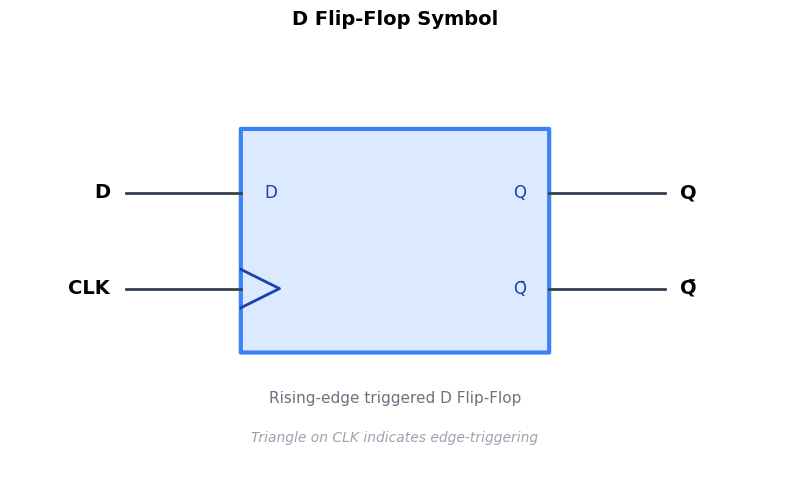

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')
ax.set_xlim(0, 100)
ax.set_ylim(0, 70)
ax.set_title('D Flip-Flop Symbol', fontsize=14, fontweight='bold')

# Main box
box = FancyBboxPatch((30, 20), 40, 35, boxstyle='round,pad=0.02',
                     facecolor='#dbeafe', edgecolor='#3b82f6', linewidth=3)
ax.add_patch(box)

# D input
ax.plot([15, 30], [45, 45], color='#374151', lw=2)
ax.text(13, 45, 'D', fontsize=14, fontweight='bold', ha='right', va='center')
ax.text(33, 45, 'D', fontsize=12, ha='left', va='center', color='#1e40af')

# Clock input with triangle
ax.plot([15, 30], [30, 30], color='#374151', lw=2)
ax.text(13, 30, 'CLK', fontsize=14, fontweight='bold', ha='right', va='center')
# Clock triangle
ax.plot([30, 35, 30], [33, 30, 27], color='#1e40af', lw=2)

# Q output
ax.plot([70, 85], [45, 45], color='#374151', lw=2)
ax.text(87, 45, 'Q', fontsize=14, fontweight='bold', ha='left', va='center')
ax.text(67, 45, 'Q', fontsize=12, ha='right', va='center', color='#1e40af')

# Q-bar output
ax.plot([70, 85], [30, 30], color='#374151', lw=2)
ax.text(87, 30, 'Q̄', fontsize=14, fontweight='bold', ha='left', va='center')
ax.text(67, 30, 'Q̄', fontsize=12, ha='right', va='center', color='#1e40af')

# Label
ax.text(50, 12, 'Rising-edge triggered D Flip-Flop', ha='center', fontsize=11, color='#6b7280')
ax.text(50, 6, 'Triangle on CLK indicates edge-triggering', ha='center', fontsize=10, color='#9ca3af', style='italic')

plt.tight_layout()
plt.show()

### Truth Table

In truth tables for sequential circuits, **Q(next)** represents the value Q will have *after* the clock edge — the "next state" of the output.

| CLK | D | Q(next) | Description |
|-----|---|---------|-------------|
| ↑   | 0 | 0       | Captures 0 on rising edge |
| ↑   | 1 | 1       | Captures 1 on rising edge |
| —   | X | Q       | No edge → Q unchanged |

**Key insight:** Q only changes at the rising edge (↑) of CLK. At all other times, Q holds its value regardless of what D does.

---

## How to Read a Timing Diagram

Throughout this tutorial, we'll use **timing diagrams** to visualize flip-flop behavior. Here's how to read them:

**The basics:**
- **Horizontal axis** = Time (progressing left to right)
- **Vertical axis** = Signal value (LOW=0 at bottom, HIGH=1 at top)
- **Each row** = One signal (labeled on the left: CLK, D, Q, etc.)
- **Vertical dashed lines** = Clock edges (reference points)

**Signal shapes:**
- **Square wave** (CLK): Alternates HIGH/LOW periodically
- **Step changes**: Signal transitions from one level to another
- **Flat sections**: Signal holding steady

**Reading tip:** At each rising clock edge, note D's value — that's what Q will become. The clock edge is the cause; Q capturing D is the effect.

---

## Edge-Triggered Behavior

The defining characteristic of a flip-flop is **edge triggering**. Let's visualize this with a simple example:

- **D=1 before edge 1**: Shows a value that IS captured at the rising edge
- **D=1 between edges 1-2**: Shows that changes between clock edges are IGNORED  
- **D=1 stable across edges 3-4**: Shows normal capture of a stable signal

The core principle: **only the value of D at the exact moment of the rising edge matters**.

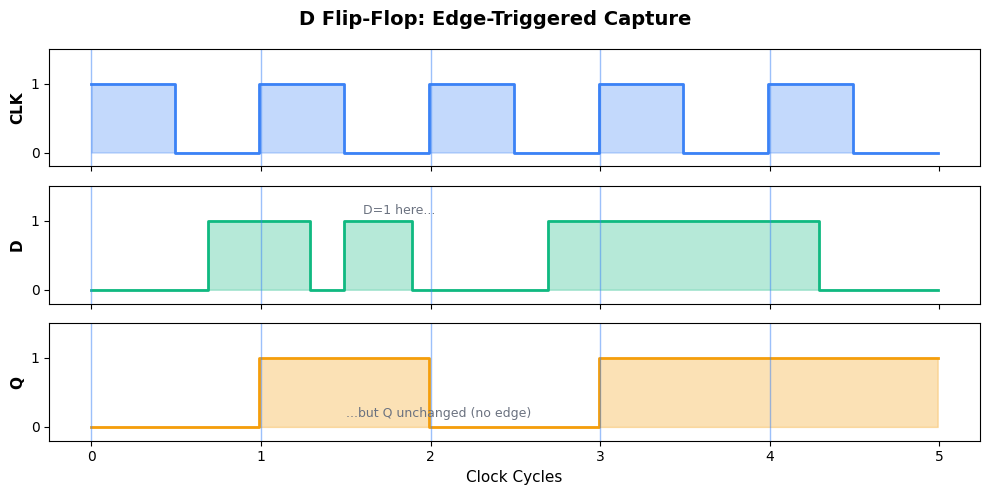

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
fig.suptitle('D Flip-Flop: Edge-Triggered Capture', fontsize=14, fontweight='bold')

t = np.arange(0, 5, 0.01)

clk = np.zeros_like(t)
for i in range(5):
    clk[(t >= i) & (t < i + 0.5)] = 1

# D signal - must be 1 AT the rising edge for Q to capture 1
d_signal = np.zeros_like(t)
d_signal[(t >= 0.7) & (t < 1.3)] = 1   # D=1 at edge 1 (t=1)
d_signal[(t >= 1.5) & (t < 1.9)] = 1   # D=1 between edges - ignored
d_signal[(t >= 2.7) & (t < 4.3)] = 1   # D=1 at edges 3 and 4

# Q captures D at each rising edge
# Edge 0 (t=0): D=0 -> Q=0
# Edge 1 (t=1): D=1 -> Q=1
# Edge 2 (t=2): D=0 -> Q=0
# Edge 3 (t=3): D=1 -> Q=1
# Edge 4 (t=4): D=1 -> Q=1
q_values = [0, 1, 0, 1, 1]
q_signal = np.zeros_like(t)
for i, val in enumerate(q_values):
    q_signal[(t >= i) & (t < i + 1)] = val

axes[0].fill_between(t, 0, clk, color='#3b82f6', alpha=0.3, step='pre')
axes[0].plot(t, clk, color='#3b82f6', lw=2, drawstyle='steps-pre')
axes[0].set_ylabel('CLK', fontsize=11, fontweight='bold')
axes[0].set_ylim(-0.2, 1.5)
axes[0].set_yticks([0, 1])

axes[1].fill_between(t, 0, d_signal, color='#10b981', alpha=0.3, step='pre')
axes[1].plot(t, d_signal, color='#10b981', lw=2, drawstyle='steps-pre')
axes[1].set_ylabel('D', fontsize=11, fontweight='bold')
axes[1].set_ylim(-0.2, 1.5)
axes[1].set_yticks([0, 1])

axes[2].fill_between(t, 0, q_signal, color='#f59e0b', alpha=0.3, step='pre')
axes[2].plot(t, q_signal, color='#f59e0b', lw=2, drawstyle='steps-pre')
axes[2].set_ylabel('Q', fontsize=11, fontweight='bold')
axes[2].set_ylim(-0.2, 1.5)
axes[2].set_yticks([0, 1])
axes[2].set_xlabel('Clock Cycles', fontsize=11)

for i in range(5):
    for ax in axes:
        ax.axvline(x=i, color='#3b82f6', linestyle='-', lw=1, alpha=0.5)

axes[1].annotate('D=1 here...', xy=(1.6, 1.1), fontsize=9, color='#6b7280')
axes[2].annotate('...but Q unchanged (no edge)', xy=(1.5, 0.15), fontsize=9, color='#6b7280')

plt.tight_layout()
plt.show()

**Notice:**
- D can change freely between clock edges — Q ignores it
- Q only updates at rising edges, capturing whatever D was at that instant
- Q holds its value until the next rising edge

---

## Timing Parameters

For reliable operation, flip-flops have critical timing requirements. Let's zoom in on a single clock edge to understand them:

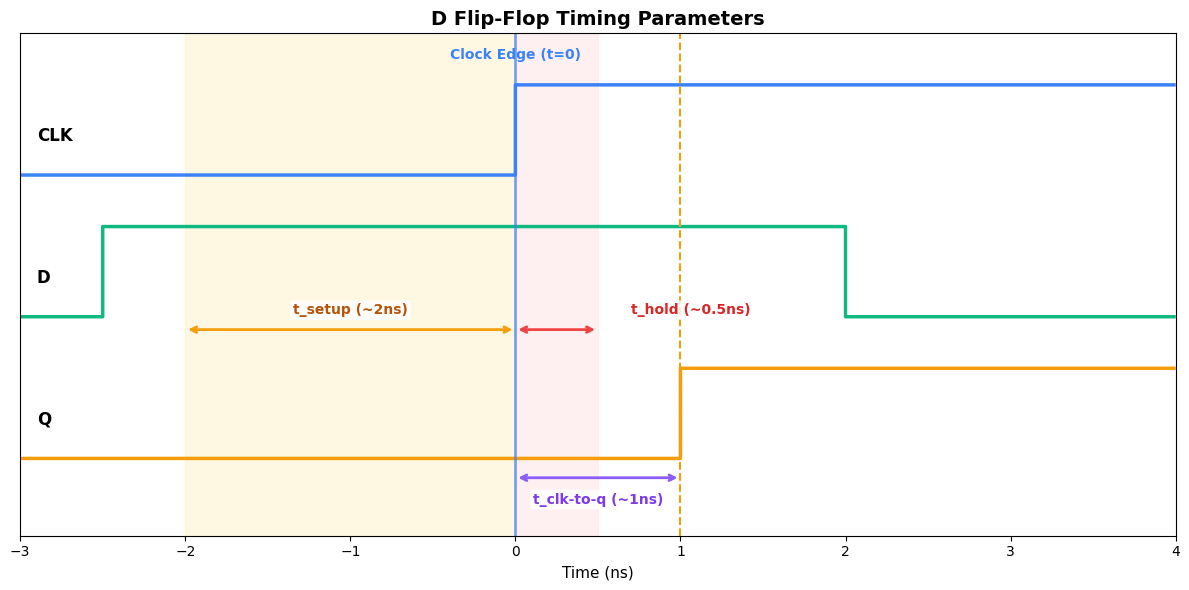

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('D Flip-Flop Timing Parameters', fontsize=14, fontweight='bold')

t = np.arange(-3, 4, 0.01)

# Clock edge at t=0
clk = np.zeros_like(t)
clk[t >= 0] = 1

# D signal - stable from before setup through hold
d_signal = np.zeros_like(t)
d_signal[(t >= -2.5) & (t < 2)] = 1

# Q signal - changes after clk-to-q delay (~1ns)
q_signal = np.zeros_like(t)
q_signal[t >= 1] = 1

# Plot signals with vertical offset
ax.plot(t, clk * 0.7 + 2.2, color='#3b82f6', lw=2.5, drawstyle='steps-pre')
ax.text(-2.9, 2.5, 'CLK', fontsize=12, fontweight='bold', va='center')

ax.plot(t, d_signal * 0.7 + 1.1, color='#10b981', lw=2.5, drawstyle='steps-pre')
ax.text(-2.9, 1.4, 'D', fontsize=12, fontweight='bold', va='center')

ax.plot(t, q_signal * 0.7 + 0, color='#f59e0b', lw=2.5, drawstyle='steps-pre')
ax.text(-2.9, 0.3, 'Q', fontsize=12, fontweight='bold', va='center')

# Clock edge reference line at t=0
ax.axvline(x=0, color='#3b82f6', linestyle='-', lw=2, alpha=0.7)

# Setup time (~2ns before edge)
ax.axvspan(-2, 0, color='#fef3c7', alpha=0.5)
ax.annotate('', xy=(-2, 1.0), xytext=(0, 1.0),
           arrowprops=dict(arrowstyle='<->', color='#f59e0b', lw=2))
ax.text(-1, 1.12, 't_setup (~2ns)', ha='center', fontsize=10, fontweight='bold', color='#b45309',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8))

# Hold time (~0.5ns after edge)
ax.axvspan(0, 0.5, color='#fee2e2', alpha=0.5)
ax.annotate('', xy=(0, 1.0), xytext=(0.5, 1.0),
           arrowprops=dict(arrowstyle='<->', color='#ef4444', lw=2))
ax.text(0.7, 1.12, 't_hold (~0.5ns)', ha='left', fontsize=10, fontweight='bold', color='#dc2626',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8))

# Clock-to-Q delay (~1ns)
ax.axvline(x=1, color='#f59e0b', linestyle='--', lw=1.5)
ax.annotate('', xy=(0, -0.15), xytext=(1, -0.15),
           arrowprops=dict(arrowstyle='<->', color='#8b5cf6', lw=2))
ax.text(0.5, -0.35, 't_clk-to-q (~1ns)', ha='center', fontsize=10, fontweight='bold', color='#7c3aed',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8))

# Annotations
ax.text(0, 3.1, 'Clock Edge (t=0)', ha='center', fontsize=10, fontweight='bold', color='#3b82f6')

ax.set_xlim(-3, 4)
ax.set_ylim(-0.6, 3.3)
ax.set_yticks([])
ax.set_xlabel('Time (ns)', fontsize=11)

plt.tight_layout()
plt.show()

### Key Timing Parameters

| Parameter | Symbol | Description | Typical Value |
|-----------|--------|-------------|---------------|
| **Setup time** | t_setup | D must be stable before clock edge | 0.1-2 ns |
| **Hold time** | t_hold | D must remain stable after clock edge | 0.05-0.5 ns |
| **Clock-to-Q** | t_clk-to-q | Time from clock edge to Q change | 0.1-1 ns |

### Why do these exist?

Flip-flops are built from transistors, and transistors aren't instant switches. The delays come from **charging and discharging tiny capacitors** inside the chip:

**Setup time** — The flip-flop's internal nodes (tiny capacitors formed by transistor gates and wires) need time to charge or discharge to stable voltage levels before the clock edge samples them. If D is still changing, the internal voltages are unstable and the flip-flop may latch an undefined value.

**Hold time** — When the clock edge arrives, the flip-flop begins "closing the gate" between input and output. During this brief transition, the input still has some influence on the internal nodes. D must stay stable until the isolation is complete.

**Clock-to-Q** — After latching the value internally, the output transistors must switch state. This means charging/discharging the output node capacitance through the transistor's resistance. The delay follows τ = RC (resistance × capacitance).

**In short**: Every signal change requires moving electrons to charge capacitors. This takes time — typically picoseconds to nanoseconds depending on the capacitance and the transistor's drive strength.

### What happens if you violate these?

- **Setup violation**: D changes too close to clock edge → Q might capture wrong value
- **Hold violation**: D changes too soon after clock edge → Q becomes **metastable** (indeterminate state)

### Who ensures timing is correct?

The **circuit designer** is responsible, with help from **Electronic Design Automation (EDA) tools**:

1. **Static Timing Analysis (STA)**: Tools automatically check every path in your design and report violations before you fabricate the chip

2. **For setup violations** (most common): 
   - Reduce the clock frequency (more time for signals to settle)
   - Shorten combinational logic paths by adding pipeline stages
   - Use faster logic gates

3. **For hold violations**:
   - Add delay buffers to slow down fast paths
   - Usually less common because gates have inherent delay

In practice, you design your circuit, run STA, fix any reported violations, and repeat until clean.

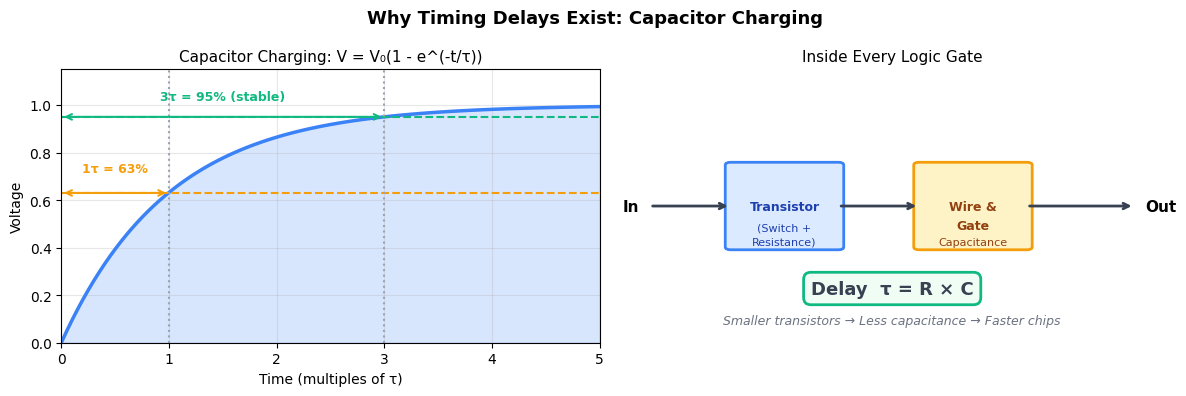

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Why Timing Delays Exist: Capacitor Charging', fontsize=13, fontweight='bold')

# Left: RC charging curve
t = np.linspace(0, 5, 100)
tau = 1
v_charge = 1 - np.exp(-t/tau)

ax1 = axes[0]
ax1.fill_between(t, 0, v_charge, color='#3b82f6', alpha=0.2)
ax1.plot(t, v_charge, color='#3b82f6', lw=2.5, label='Voltage')
ax1.axhline(y=0.63, color='#f59e0b', linestyle='--', lw=1.5)
ax1.axhline(y=0.95, color='#10b981', linestyle='--', lw=1.5)
ax1.axvline(x=1, color='#9ca3af', linestyle=':', lw=1.5)
ax1.axvline(x=3, color='#9ca3af', linestyle=':', lw=1.5)

ax1.annotate('', xy=(0, 0.63), xytext=(1, 0.63), arrowprops=dict(arrowstyle='<->', color='#f59e0b', lw=1.5))
ax1.text(0.5, 0.72, '1τ = 63%', fontsize=9, ha='center', color='#f59e0b', fontweight='bold')

ax1.annotate('', xy=(0, 0.95), xytext=(3, 0.95), arrowprops=dict(arrowstyle='<->', color='#10b981', lw=1.5))
ax1.text(1.5, 1.02, '3τ = 95% (stable)', fontsize=9, ha='center', color='#10b981', fontweight='bold')

ax1.set_xlabel('Time (multiples of τ)', fontsize=10)
ax1.set_ylabel('Voltage', fontsize=10)
ax1.set_title('Capacitor Charging: V = V₀(1 - e^(-t/τ))', fontsize=11)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 1.15)
ax1.grid(True, alpha=0.3)

# Right: Clean block diagram
ax2 = axes[1]
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('Inside Every Logic Gate', fontsize=11)

# Input
ax2.annotate('', xy=(2, 5), xytext=(0.5, 5), arrowprops=dict(arrowstyle='->', color='#374151', lw=2))
ax2.text(0.3, 5, 'In', fontsize=11, fontweight='bold', va='center', ha='right')

# Transistor box
from matplotlib.patches import FancyBboxPatch
transistor = FancyBboxPatch((2, 3.5), 2, 3, boxstyle='round,pad=0.1', 
                             facecolor='#dbeafe', edgecolor='#3b82f6', lw=2)
ax2.add_patch(transistor)
ax2.text(3, 5, 'Transistor', fontsize=9, ha='center', va='center', fontweight='bold', color='#1e40af')
ax2.text(3, 4.2, '(Switch +', fontsize=8, ha='center', va='center', color='#1e40af')
ax2.text(3, 3.7, 'Resistance)', fontsize=8, ha='center', va='center', color='#1e40af')

# Arrow to capacitor
ax2.annotate('', xy=(5.5, 5), xytext=(4, 5), arrowprops=dict(arrowstyle='->', color='#374151', lw=2))

# Capacitor box
capacitor = FancyBboxPatch((5.5, 3.5), 2, 3, boxstyle='round,pad=0.1',
                           facecolor='#fef3c7', edgecolor='#f59e0b', lw=2)
ax2.add_patch(capacitor)
ax2.text(6.5, 5, 'Wire &', fontsize=9, ha='center', va='center', fontweight='bold', color='#92400e')
ax2.text(6.5, 4.3, 'Gate', fontsize=9, ha='center', va='center', fontweight='bold', color='#92400e')
ax2.text(6.5, 3.7, 'Capacitance', fontsize=8, ha='center', va='center', color='#92400e')

# Output
ax2.annotate('', xy=(9.5, 5), xytext=(7.5, 5), arrowprops=dict(arrowstyle='->', color='#374151', lw=2))
ax2.text(9.7, 5, 'Out', fontsize=11, fontweight='bold', va='center', ha='left')

# Formula
ax2.text(5, 1.8, 'Delay  τ = R × C', fontsize=13, ha='center', fontweight='bold', color='#374151',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='#f0fdf4', edgecolor='#10b981', lw=2))
ax2.text(5, 0.7, 'Smaller transistors → Less capacitance → Faster chips', 
         fontsize=9, ha='center', color='#6b7280', style='italic')

plt.tight_layout()
plt.show()

---

## D Flip-Flop with Reset

Most flip-flops include a **reset** input to initialize to a known state. Two types exist:

### Asynchronous Reset

- Resets Q immediately when asserted, regardless of clock
- Higher priority than clock
- Can cause timing issues if not handled carefully

**About the example timing:** The signals were chosen to highlight asynchronous behavior:

- **RST_N asserted at cycle 2.3** (mid-cycle): Notice Q goes to 0 immediately — it doesn't wait for a clock edge. This is the defining characteristic of async reset.
- **RST_N released at ~cycle 4.2** (also mid-cycle): Normal operation resumes at the next clock edge
- **D has values during reset**: Even though D=1 during cycles 4-5, Q stays 0 because reset has priority
- **After reset**: Q captures D normally starting at edge 5

The key insight: **asynchronous means "ignores the clock"** — reset takes effect the instant it's asserted.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
fig.suptitle('D Flip-Flop with Asynchronous Reset', fontsize=14, fontweight='bold')

t = np.arange(0, 6, 0.01)

clk = np.zeros_like(t)
for i in range(6):
    clk[(t >= i) & (t < i + 0.5)] = 1

reset_n = np.ones_like(t)
reset_n[(t >= 2.3) & (t < 4.2)] = 0

d_signal = np.zeros_like(t)
d_signal[(t >= 0.6) & (t < 2.4)] = 1
d_signal[(t >= 3.6) & (t < 5.4)] = 1

q_signal = np.zeros_like(t)
q_signal[(t >= 1) & (t < 2.3)] = 1
q_signal[(t >= 5)] = 1

axes[0].fill_between(t, 0, clk, color='#3b82f6', alpha=0.3, step='pre')
axes[0].plot(t, clk, color='#3b82f6', lw=2, drawstyle='steps-pre')
axes[0].set_ylabel('CLK', fontsize=10, fontweight='bold')
axes[0].set_ylim(-0.2, 1.4)
axes[0].set_yticks([0, 1])

axes[1].fill_between(t, 0, reset_n, color='#ef4444', alpha=0.3, step='pre')
axes[1].plot(t, reset_n, color='#ef4444', lw=2, drawstyle='steps-pre')
axes[1].set_ylabel('RST_N', fontsize=10, fontweight='bold')
axes[1].set_ylim(-0.2, 1.4)
axes[1].set_yticks([0, 1])

axes[2].fill_between(t, 0, d_signal, color='#10b981', alpha=0.3, step='pre')
axes[2].plot(t, d_signal, color='#10b981', lw=2, drawstyle='steps-pre')
axes[2].set_ylabel('D', fontsize=10, fontweight='bold')
axes[2].set_ylim(-0.2, 1.4)
axes[2].set_yticks([0, 1])

axes[3].fill_between(t, 0, q_signal, color='#f59e0b', alpha=0.3, step='pre')
axes[3].plot(t, q_signal, color='#f59e0b', lw=2, drawstyle='steps-pre')
axes[3].set_ylabel('Q', fontsize=10, fontweight='bold')
axes[3].set_ylim(-0.2, 1.4)
axes[3].set_yticks([0, 1])
axes[3].set_xlabel('Clock Cycles', fontsize=11)

# Add vertical line at reset assertion
axes[1].axvline(x=2.3, color='#ef4444', linestyle=':', lw=2, alpha=0.7)
axes[3].axvline(x=2.3, color='#ef4444', linestyle=':', lw=2, alpha=0.7)
axes[3].annotate('Q=0 immediately\nwhen RST_N goes low', xy=(2.3, 0.5), 
                xytext=(2.8, 0.7), fontsize=9, color='#ef4444',
                arrowprops=dict(arrowstyle='->', color='#ef4444', lw=1.5),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#ef4444'))

for i in range(6):
    for ax in axes:
        ax.axvline(x=i, color='#d1d5db', linestyle='--', lw=0.5)

plt.tight_layout()
plt.show()

### Synchronous Reset

- Resets Q only at the clock edge when reset is asserted
- Cleaner timing behavior
- Preferred in most modern designs

**About the example timing:** Compare this directly to the async reset above — same D pattern, same reset window:

- **RST asserted at cycle 2.3** (mid-cycle): Unlike async, Q does NOT immediately go to 0. Q was 1 at edge 2, and it stays 1!
- **Q resets at edge 3**: Only when the clock edge arrives AND reset is still active does Q go to 0
- **Reset still active at edge 4**: Q stays 0 because reset overrides D
- **Normal operation at edge 5**: Reset was released at ~4.2, so now D is captured normally

The key difference: **Q stays at 1 from edge 2 until edge 3**, even though reset was asserted at 2.3. Synchronous reset respects clock boundaries.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
fig.suptitle('D Flip-Flop with Synchronous Reset', fontsize=14, fontweight='bold')

t = np.arange(0, 6, 0.01)

clk = np.zeros_like(t)
for i in range(6):
    clk[(t >= i) & (t < i + 0.5)] = 1

reset = np.zeros_like(t)
reset[(t >= 2.3) & (t < 4.2)] = 1

d_signal = np.zeros_like(t)
d_signal[(t >= 0.6) & (t < 2.4)] = 1
d_signal[(t >= 3.6) & (t < 5.4)] = 1

q_signal = np.zeros_like(t)
q_signal[(t >= 1) & (t < 3)] = 1
q_signal[(t >= 5)] = 1

axes[0].fill_between(t, 0, clk, color='#3b82f6', alpha=0.3, step='pre')
axes[0].plot(t, clk, color='#3b82f6', lw=2, drawstyle='steps-pre')
axes[0].set_ylabel('CLK', fontsize=10, fontweight='bold')
axes[0].set_ylim(-0.2, 1.4)
axes[0].set_yticks([0, 1])

axes[1].fill_between(t, 0, reset, color='#ef4444', alpha=0.3, step='pre')
axes[1].plot(t, reset, color='#ef4444', lw=2, drawstyle='steps-pre')
axes[1].set_ylabel('RST', fontsize=10, fontweight='bold')
axes[1].set_ylim(-0.2, 1.4)
axes[1].set_yticks([0, 1])

axes[2].fill_between(t, 0, d_signal, color='#10b981', alpha=0.3, step='pre')
axes[2].plot(t, d_signal, color='#10b981', lw=2, drawstyle='steps-pre')
axes[2].set_ylabel('D', fontsize=10, fontweight='bold')
axes[2].set_ylim(-0.2, 1.4)
axes[2].set_yticks([0, 1])

axes[3].fill_between(t, 0, q_signal, color='#f59e0b', alpha=0.3, step='pre')
axes[3].plot(t, q_signal, color='#f59e0b', lw=2, drawstyle='steps-pre')
axes[3].set_ylabel('Q', fontsize=10, fontweight='bold')
axes[3].set_ylim(-0.2, 1.4)
axes[3].set_yticks([0, 1])
axes[3].set_xlabel('Clock Cycles', fontsize=11)

axes[3].annotate('Waits for edge 3', xy=(3, 0.15), fontsize=9, color='#ef4444')

for i in range(6):
    for ax in axes:
        ax.axvline(x=i, color='#d1d5db', linestyle='--', lw=0.5)

plt.tight_layout()
plt.show()

**Comparison:**

| Aspect | Asynchronous | Synchronous |
|--------|--------------|-------------|
| Reset timing | Immediate | At clock edge |
| Priority | Higher than clock | Same as data |
| Timing analysis | More complex | Simpler |
| Use case | Power-on reset | Normal operation |

---

## D Flip-Flop with Enable

An **enable** input allows you to selectively update the flip-flop.

**About the example values:**

- **D pattern** `[1,0,1,0,1,0]`: Alternating values to clearly show when D is captured vs ignored
- **EN pattern:** High at **edges 0, 1, 4, and 5** (two separate update windows)

**Why this matters — trace through the diagram:**

- **Edges 0 and 1 (EN=1)**: Q follows D → captures 1, then 0
- **Edges 2 and 3 (EN=0)**: D changes to 1, then 0, but Q stays at 0 (its last captured value)
- **Edges 4 and 5 (EN=1)**: Q captures again → gets 1, then 0

The Q values `[1,0,0,0,1,0]` follow directly from the rule: "capture D when EN=1, hold when EN=0".

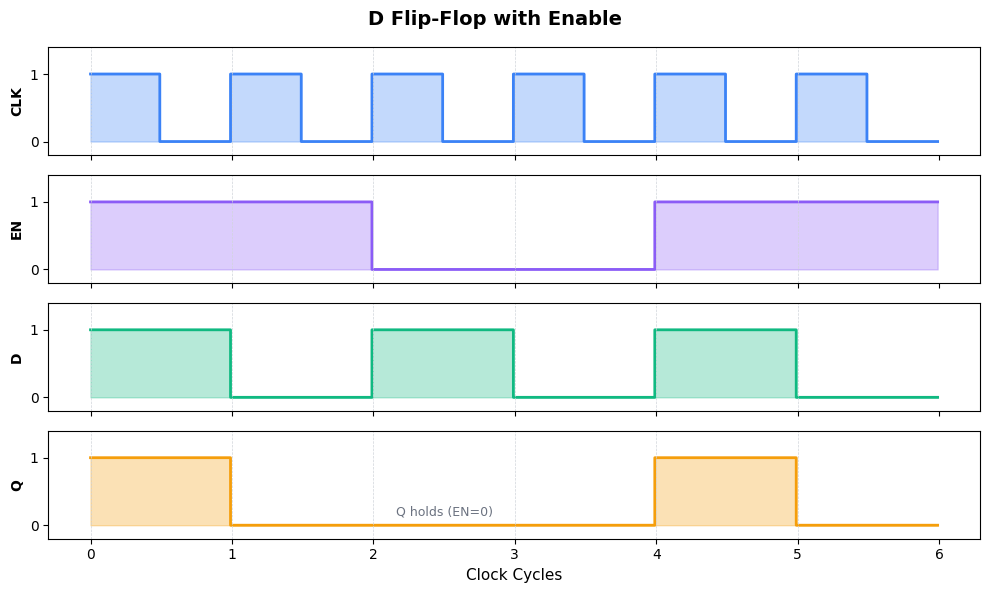

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
fig.suptitle('D Flip-Flop with Enable', fontsize=14, fontweight='bold')

t = np.arange(0, 6, 0.01)

clk = np.zeros_like(t)
for i in range(6):
    clk[(t >= i) & (t < i + 0.5)] = 1

enable = np.zeros_like(t)
enable[(t >= 0) & (t < 2)] = 1
enable[(t >= 4) & (t < 6)] = 1

d_values = [1, 0, 1, 0, 1, 0]
d_signal = np.zeros_like(t)
for i, val in enumerate(d_values):
    d_signal[(t >= i) & (t < i + 1)] = val

q_values = [1, 0, 0, 0, 1, 0]
q_signal = np.zeros_like(t)
for i, val in enumerate(q_values):
    q_signal[(t >= i) & (t < i + 1)] = val

axes[0].fill_between(t, 0, clk, color='#3b82f6', alpha=0.3, step='pre')
axes[0].plot(t, clk, color='#3b82f6', lw=2, drawstyle='steps-pre')
axes[0].set_ylabel('CLK', fontsize=10, fontweight='bold')
axes[0].set_ylim(-0.2, 1.4)
axes[0].set_yticks([0, 1])

axes[1].fill_between(t, 0, enable, color='#8b5cf6', alpha=0.3, step='pre')
axes[1].plot(t, enable, color='#8b5cf6', lw=2, drawstyle='steps-pre')
axes[1].set_ylabel('EN', fontsize=10, fontweight='bold')
axes[1].set_ylim(-0.2, 1.4)
axes[1].set_yticks([0, 1])

axes[2].fill_between(t, 0, d_signal, color='#10b981', alpha=0.3, step='pre')
axes[2].plot(t, d_signal, color='#10b981', lw=2, drawstyle='steps-pre')
axes[2].set_ylabel('D', fontsize=10, fontweight='bold')
axes[2].set_ylim(-0.2, 1.4)
axes[2].set_yticks([0, 1])

axes[3].fill_between(t, 0, q_signal, color='#f59e0b', alpha=0.3, step='pre')
axes[3].plot(t, q_signal, color='#f59e0b', lw=2, drawstyle='steps-pre')
axes[3].set_ylabel('Q', fontsize=10, fontweight='bold')
axes[3].set_ylim(-0.2, 1.4)
axes[3].set_yticks([0, 1])
axes[3].set_xlabel('Clock Cycles', fontsize=11)

axes[3].annotate('Q holds (EN=0)', xy=(2.5, 0.15), fontsize=9, color='#6b7280', ha='center')

for i in range(6):
    for ax in axes:
        ax.axvline(x=i, color='#d1d5db', linestyle='--', lw=0.5)

plt.tight_layout()
plt.show()

**Enable behavior:**
- **EN=1 at clock edge**: Q captures D (normal operation)
- **EN=0 at clock edge**: Q holds its current value (D ignored)

**Use cases:**
- Selective register updates
- Building larger registers with load enable
- Power saving (clock gating)

---

## Building Registers from Flip-Flops

A **register** is simply multiple flip-flops sharing the same clock, storing multi-bit values:

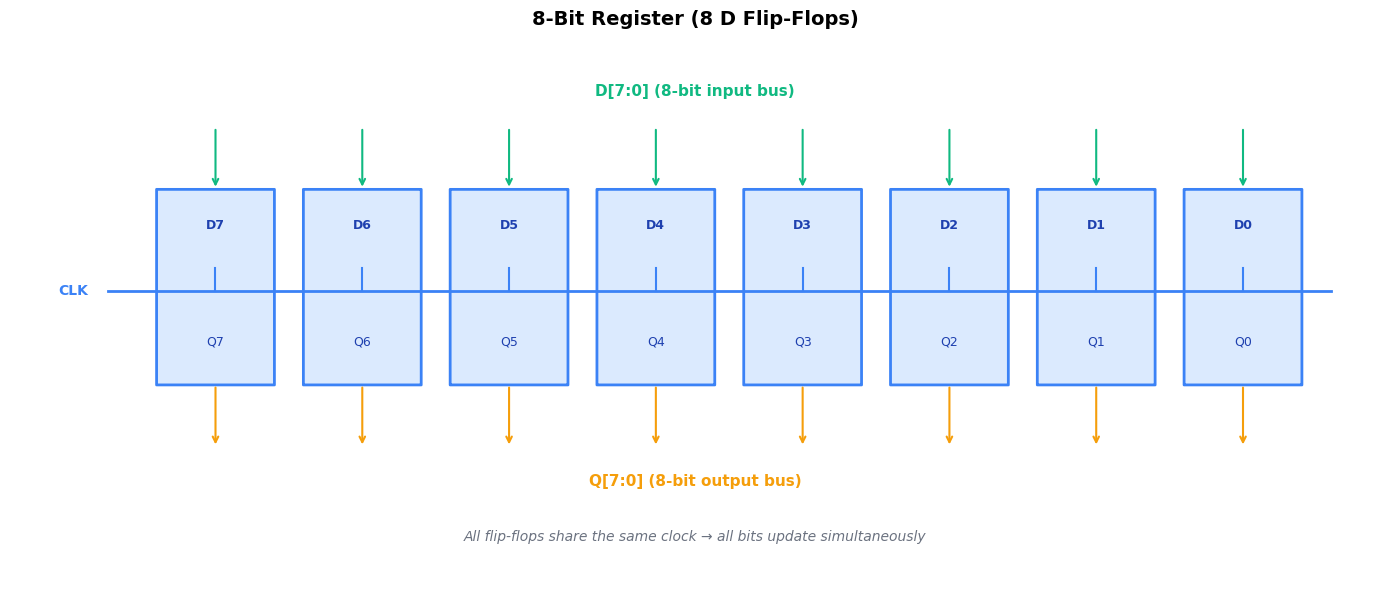

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')
ax.set_xlim(0, 140)
ax.set_ylim(0, 70)
ax.set_title('8-Bit Register (8 D Flip-Flops)', fontsize=14, fontweight='bold')

# Draw 8 flip-flops
for i in range(8):
    x = 15 + i * 15
    box = FancyBboxPatch((x, 25), 12, 25, boxstyle='round,pad=0.02',
                         facecolor='#dbeafe', edgecolor='#3b82f6', linewidth=2)
    ax.add_patch(box)
    ax.text(x + 6, 45, f'D{7-i}', fontsize=9, ha='center', fontweight='bold', color='#1e40af')
    ax.text(x + 6, 30, f'Q{7-i}', fontsize=9, ha='center', color='#1e40af')
    
    # D input arrow
    ax.annotate('', xy=(x + 6, 50), xytext=(x + 6, 58),
               arrowprops=dict(arrowstyle='->', color='#10b981', lw=1.5))
    
    # Q output arrow
    ax.annotate('', xy=(x + 6, 17), xytext=(x + 6, 25),
               arrowprops=dict(arrowstyle='->', color='#f59e0b', lw=1.5))

# Common clock line
ax.plot([10, 135], [37, 37], color='#3b82f6', lw=2)
for i in range(8):
    x = 15 + i * 15 + 6
    ax.plot([x, x], [37, 40], color='#3b82f6', lw=1.5)

ax.text(8, 37, 'CLK', fontsize=10, ha='right', va='center', fontweight='bold', color='#3b82f6')

# Labels
ax.text(70, 62, 'D[7:0] (8-bit input bus)', fontsize=11, ha='center', color='#10b981', fontweight='bold')
ax.text(70, 12, 'Q[7:0] (8-bit output bus)', fontsize=11, ha='center', color='#f59e0b', fontweight='bold')
ax.text(70, 5, 'All flip-flops share the same clock → all bits update simultaneously', 
        fontsize=10, ha='center', color='#6b7280', style='italic')

plt.tight_layout()
plt.show()

**Register properties:**
- All bits update atomically at the same clock edge
- Adding enable creates a "load" function
- Adding reset initializes all bits to 0 (or preset to 1)
- Common widths: 8, 16, 32, 64 bits

---

## Common Applications

1. **Data Storage** — Registers hold values between operations in processors and digital systems. Every CPU register (like the program counter, instruction register, or general-purpose registers) is built from flip-flops. When you read "32-bit processor," those are 32 flip-flops working together to store each register value.

2. **Pipelining** — Flip-flops separate pipeline stages, allowing multiple operations in flight simultaneously. Modern CPUs break instruction execution into stages (fetch, decode, execute, memory, write-back), with registers between each stage. This lets the CPU work on five different instructions at once, dramatically increasing throughput.

3. **Counters** — Chained flip-flops with feedback create binary counters for timers, frequency dividers, and address generation. A 4-bit counter cycles through 0→1→2→...→15→0 by connecting each flip-flop's Q output to the next flip-flop's clock input. These are everywhere: timers in microcontrollers, clock dividers in PLLs, and memory address counters.

4. **Shift Registers** — Serial-to-parallel or parallel-to-serial conversion for data transmission and signal processing. By connecting flip-flops in a chain (Q of one feeds D of the next), data "shifts" one position per clock cycle. Used in serial communication (UART, SPI), LED matrix control, and implementing delays in signal processing.

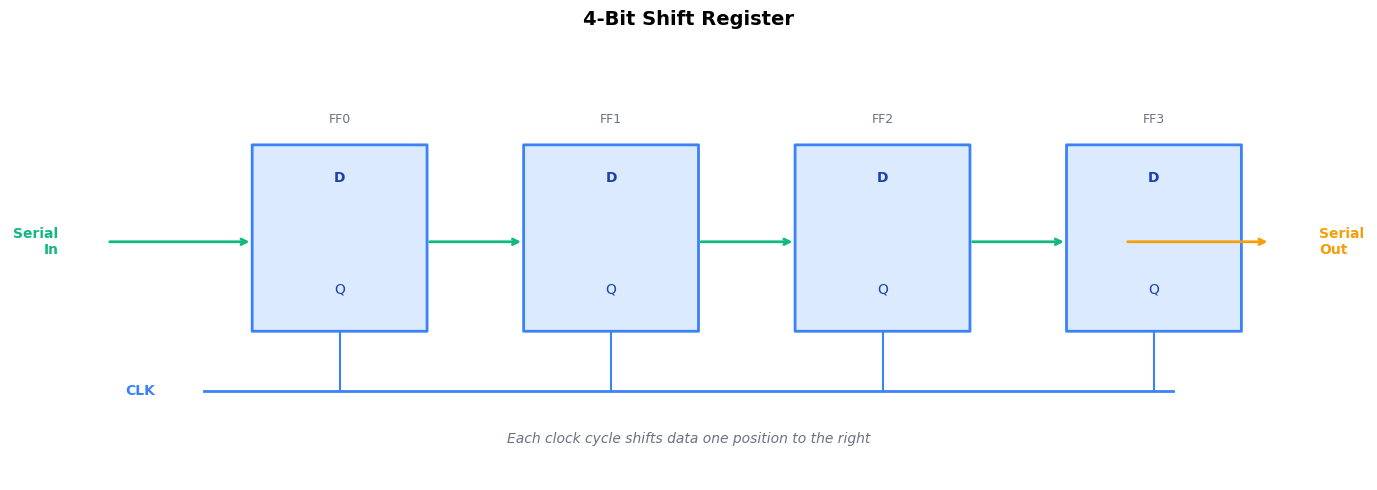

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(14, 5))
ax.axis('off')
ax.set_xlim(0, 140)
ax.set_ylim(0, 60)
ax.set_title('4-Bit Shift Register', fontsize=14, fontweight='bold')

# Draw 4 flip-flops connected in series
for i in range(4):
    x = 25 + i * 28
    box = FancyBboxPatch((x, 20), 18, 25, boxstyle='round,pad=0.02',
                         facecolor='#dbeafe', edgecolor='#3b82f6', linewidth=2)
    ax.add_patch(box)
    ax.text(x + 9, 40, 'D', fontsize=10, ha='center', fontweight='bold', color='#1e40af')
    ax.text(x + 9, 25, 'Q', fontsize=10, ha='center', color='#1e40af')
    ax.text(x + 9, 48, f'FF{i}', fontsize=9, ha='center', color='#6b7280')
    
    # Connect Q to next D
    if i < 3:
        ax.annotate('', xy=(x + 28, 32), xytext=(x + 18, 32),
                   arrowprops=dict(arrowstyle='->', color='#10b981', lw=2))

# Serial input
ax.annotate('', xy=(25, 32), xytext=(10, 32),
           arrowprops=dict(arrowstyle='->', color='#10b981', lw=2))
ax.text(5, 32, 'Serial\nIn', fontsize=10, ha='right', va='center', fontweight='bold', color='#10b981')

# Serial output
ax.annotate('', xy=(130, 32), xytext=(115, 32),
           arrowprops=dict(arrowstyle='->', color='#f59e0b', lw=2))
ax.text(135, 32, 'Serial\nOut', fontsize=10, ha='left', va='center', fontweight='bold', color='#f59e0b')

# Clock
ax.plot([20, 120], [12, 12], color='#3b82f6', lw=2)
for i in range(4):
    x = 25 + i * 28 + 9
    ax.plot([x, x], [12, 20], color='#3b82f6', lw=1.5)
ax.text(15, 12, 'CLK', fontsize=10, ha='right', va='center', fontweight='bold', color='#3b82f6')

ax.text(70, 5, 'Each clock cycle shifts data one position to the right', 
        fontsize=10, ha='center', color='#6b7280', style='italic')

plt.tight_layout()
plt.show()

---

## Key Takeaways

1. **D flip-flops are 1-bit memory elements** — the building block of all sequential logic

2. **Edge triggering** is key — Q only changes at clock edges, providing predictable timing

3. **Timing parameters matter:**
   - Setup time: Data must arrive before the clock edge
   - Hold time: Data must stay stable after the clock edge
   - Clock-to-Q: Output delay after the clock edge

4. **Reset options:**
   - Asynchronous: Immediate, for power-on
   - Synchronous: At clock edge, cleaner timing

5. **Enable** allows selective updates — Q holds when disabled

6. **Registers** are just multiple flip-flops sharing a clock

---

*Every counter, state machine, processor register, and memory cell uses flip-flops. Master the D flip-flop, and you've mastered the atom of digital memory.*